### __My EDA Notebook__

* __Data Description__  
https://www.kaggle.com/uciml/adult-census-income  
The prediction task is to determine whether a person makes over $50K a year.   
Target Value : "income" (Binary-Classification)

In [1]:
!python --version

Python 3.8.6


#### __1. Load Data__

* 32561 rows, 15 variables

In [2]:
import pandas as pd
df = pd.read_csv('adult_census.csv')
print(df.shape)
df.head(3)

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### __2. Exploring target variable ("income")__

In [4]:
target_var = 'income'
num_unique = df[target_var].nunique()
distinct_values = df[target_var].unique()
print("The target '{}' has {} classes : {}".format(target_var, num_unique, distinct_values))

The target 'income' has 2 classes : ['<=50K' '>50K']


In [5]:
target_dist = pd.concat([ df[target_var].value_counts().sort_index()
                         , df[target_var].value_counts(normalize=True).sort_index()*100 ]
                        , axis=1)
target_dist.columns = ['count', 'ratio(%)']
target_dist

,count,ratio(%)
<=50K,24720,75.919044
>50K,7841,24.080956


#### __3. Exploring input features__   
##### __3-(1). Numeric features__   

In [6]:
import numpy as np
np.set_printoptions(precision=5, edgeitems=3, suppress=True, linewidth=1000)

In [7]:
numeric_df = df.drop(target_var, axis=1).select_dtypes(include='number')
numeric_colname = numeric_df.columns
print(numeric_df.shape)
print(numeric_colname)

(32561, 6)
Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [8]:
numeric_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

* 'capital.gain' & 'capital.loss' : Most 0s.

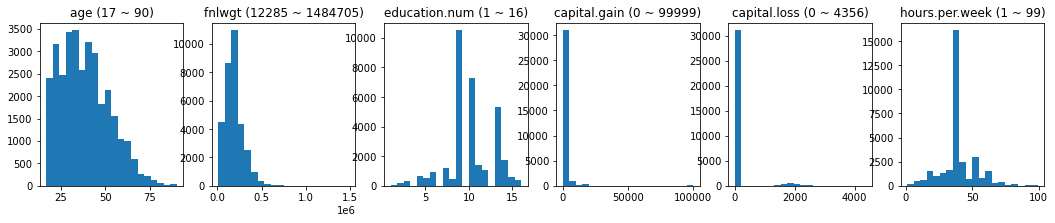

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_colname), figsize=(3*len(numeric_colname),3))
for i, ax in enumerate(axes) :
    a_col = numeric_colname[i]
    a_title = "{} ({} ~ {})".format(a_col, numeric_df[a_col].min(), numeric_df[a_col].max())
    numeric_df[a_col].plot(kind='hist', bins=20, ax=ax, title=a_title).set_ylabel('')

##### __3-(2). Categorical features__   

In [11]:
cate_df = df.drop(target_var, axis=1).select_dtypes(include='O')
cate_colname = cate_df.columns
print(cate_df.shape)
print(cate_colname)

(32561, 8)
Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')


In [12]:
cate_df.describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [13]:
def get_distribution(df, colname) :
    df_dist = pd.concat([ df[colname].value_counts().sort_index()
                         , df[colname].value_counts(normalize=True).sort_index()*100 ]
                        , axis=1)
    df_dist.columns = ['count', 'ratio(%)']
    df_dist = df_dist.sort_values(by='count', ascending=False)
    return df_dist

for c in cate_colname :
    print('\n*', "{} (nunique:{})".format(c, cate_df[c].nunique()))
    print(get_distribution(cate_df, c).head(3))


* workclass (nunique:9)
                  count   ratio(%)
Private           22696  69.703019
Self-emp-not-inc   2541   7.803814
Local-gov          2093   6.427935

* education (nunique:16)
              count   ratio(%)
HS-grad       10501  32.250238
Some-college   7291  22.391818
Bachelors      5355  16.446055

* marital.status (nunique:7)
                    count   ratio(%)
Married-civ-spouse  14976  45.993673
Never-married       10683  32.809189
Divorced             4443  13.645158

* occupation (nunique:15)
                 count   ratio(%)
Prof-specialty    4140  12.714597
Craft-repair      4099  12.588680
Exec-managerial   4066  12.487331

* relationship (nunique:6)
               count   ratio(%)
Husband        13193  40.517797
Not-in-family   8305  25.505973
Own-child       5068  15.564633

* race (nunique:5)
                    count   ratio(%)
White               27816  85.427352
Black                3124   9.594300
Asian-Pac-Islander   1039   3.190934

* sex (nunique:2)
 

#### __4. Relationship with target variable__

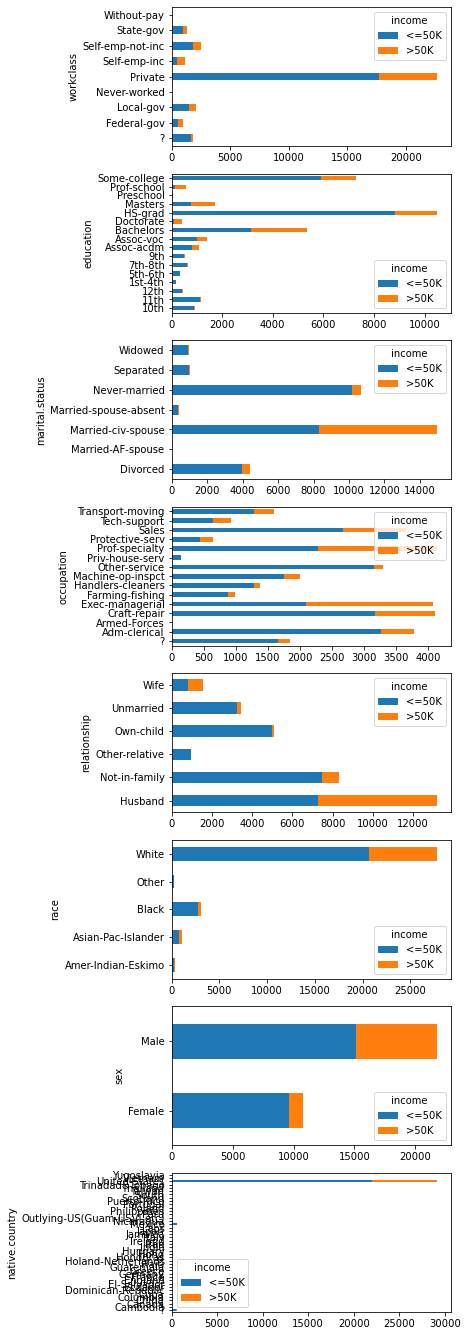

In [16]:
fig, axes = plt.subplots(nrows=len(cate_colname), ncols=1, figsize=(5, 3*len(cate_colname)))
for i, ax in enumerate(axes) :
    a_col = cate_colname[i]
    df.groupby(a_col)[target_var].value_counts(dropna=False).unstack().plot(kind='barh', stacked=True, ax=ax)